In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
import geopandas as gpd
import matplotlib as mpl
from shapely.geometry import Point,LineString,LinearRing,Polygon
from shapely.geometry import MultiPoint,MultiLineString,MultiPolygon
%matplotlib inline

In [2]:
# 读取一个shp 或者geojson文件
points = gpd.read_file(r'/Users/wl/Phd_Paper/202303Solar_Historical/gis_data/2019-2013_points_radiation.shp')

# 转换坐标
points = points.to_crs(epsg=3857)

# unary_union 将一整列矢量合并为单独的一个对象
# convex_hull 返回每个几何对象的凸多边形
# centroid  返回每个几何对象的重心（几何中心）
cx,cy = points.unary_union.convex_hull.centroid.x,points.unary_union.convex_hull.centroid.y

# 定义缓冲区
def buffer():
    for i in range(0,13):
        bf = gpd.GeoDataFrame([[(i+1),Point(cx,cy).buffer((i+1)*1500).difference(Point(cx,cy).buffer(i*1500))]],
                              columns=['buffer','geometry'],crs='epsg:3857')
        yield bf

        
# 将缓冲区进行合并
buffer = pd.concat(buffer())

# 将每个点与缓冲区进行空间连接
pointsx = gpd.sjoin(points,buffer,op='within')

# 根据缓冲区 计算平均值
dt_2019_2013 = pointsx.groupby(by='buffer').mean()['2019_2013']

dt_2013_total = pointsx.groupby(by='buffer').mean()['2013_avera']
dt_2019_total = pointsx.groupby(by='buffer').mean()['2019_avera']

/Users/wl/anaconda3/envs/ox/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/9f/lczvn2yj5xq7blvk6mz2y_lh0000gn/T/ipykernel_27135/45206416.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt_2019_2013 = pointsx.groupby(by='buffer').mean()['2019_2013']
/var/folders/9f/lczvn2yj5xq7blvk6mz2y_lh0000gn/T/ipykernel_27135/45206416.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt_2013_total

In [3]:
# 设置默认字体
plt.rcParams['font.sans-serif']=['Times New Roman'] 

## figure(a)

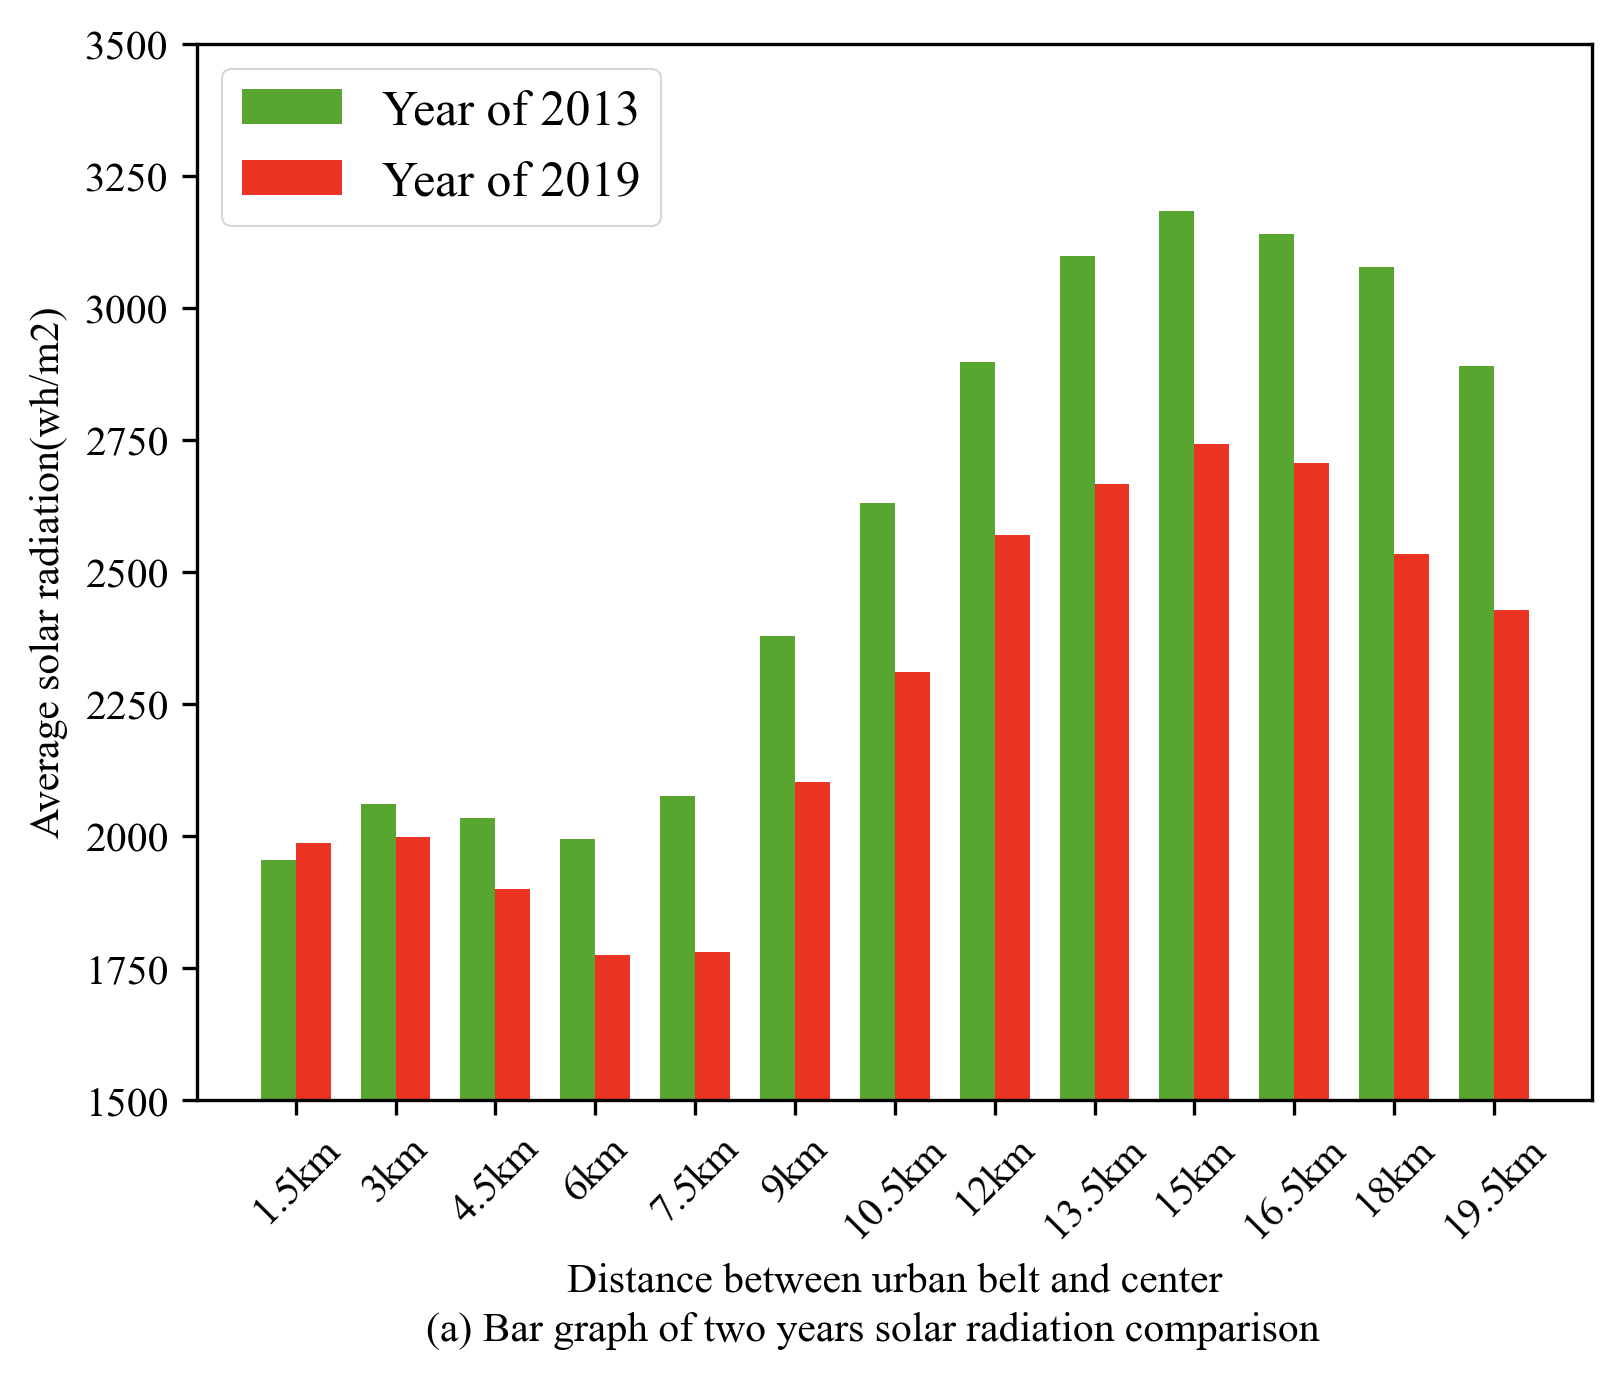

In [4]:
# 设置数据
data_2013 = list(dt_2013_total)
data_2019 = list(dt_2019_total)

# 设置绘图尺寸
fig, ax = plt.subplots(figsize=(6,4),dpi=300)

# 使用 ggplot 样式
plt.style.use('ggplot')
# 将背景设为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
# 设置边界线颜色为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# 设置刻度标签
labels = ['1.5km', '3km', '4.5km', '6km','7.5km','9km','10.5km','12km','13.5km','15km','16.5km','18km','19.5km']
x = np.arange(len(labels))
width = 0.35 # 柱状图柱子宽度

rects2013 = ax.bar(x - width/2, data_2013, width, label='Year of 2013', color='#58a530')
rects2019 = ax.bar(x + width/2, data_2019, width, label='Year of 2019', color='#ea3323')
    
ax.set_xlabel('Distance between urban belt and center',fontsize=10,color='black')
ax.set_ylabel('Average solar radiation(wh/m2)',fontsize=10,color='black')
# ax.set_title('Different urban belt comprehensive perception score in two year')

# 设置图例 frameon是否生成边框
ax.legend(frameon=True, facecolor='white', fontsize=12)

# 设置坐标轴范围
ax.set_ylim(1500, 3500)
# 设置坐标轴的刻度数量
plt.xticks(np.arange(0,13,1))
# 设置坐标轴的刻度值
a = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(a,labels,rotation = 45)

# 使用 plt.figtext 设置标题，并放置在底部
plt.figtext(0.5, -0.2, "(a) Bar graph of two years solar radiation comparison", ha="center", fontsize=10)

# 调整布局，以确保标题和图形不重叠
plt.subplots_adjust(bottom=0)

plt.show()

## figure(b)

斜率是-41.50973698221128 截距是-52.10736540313051


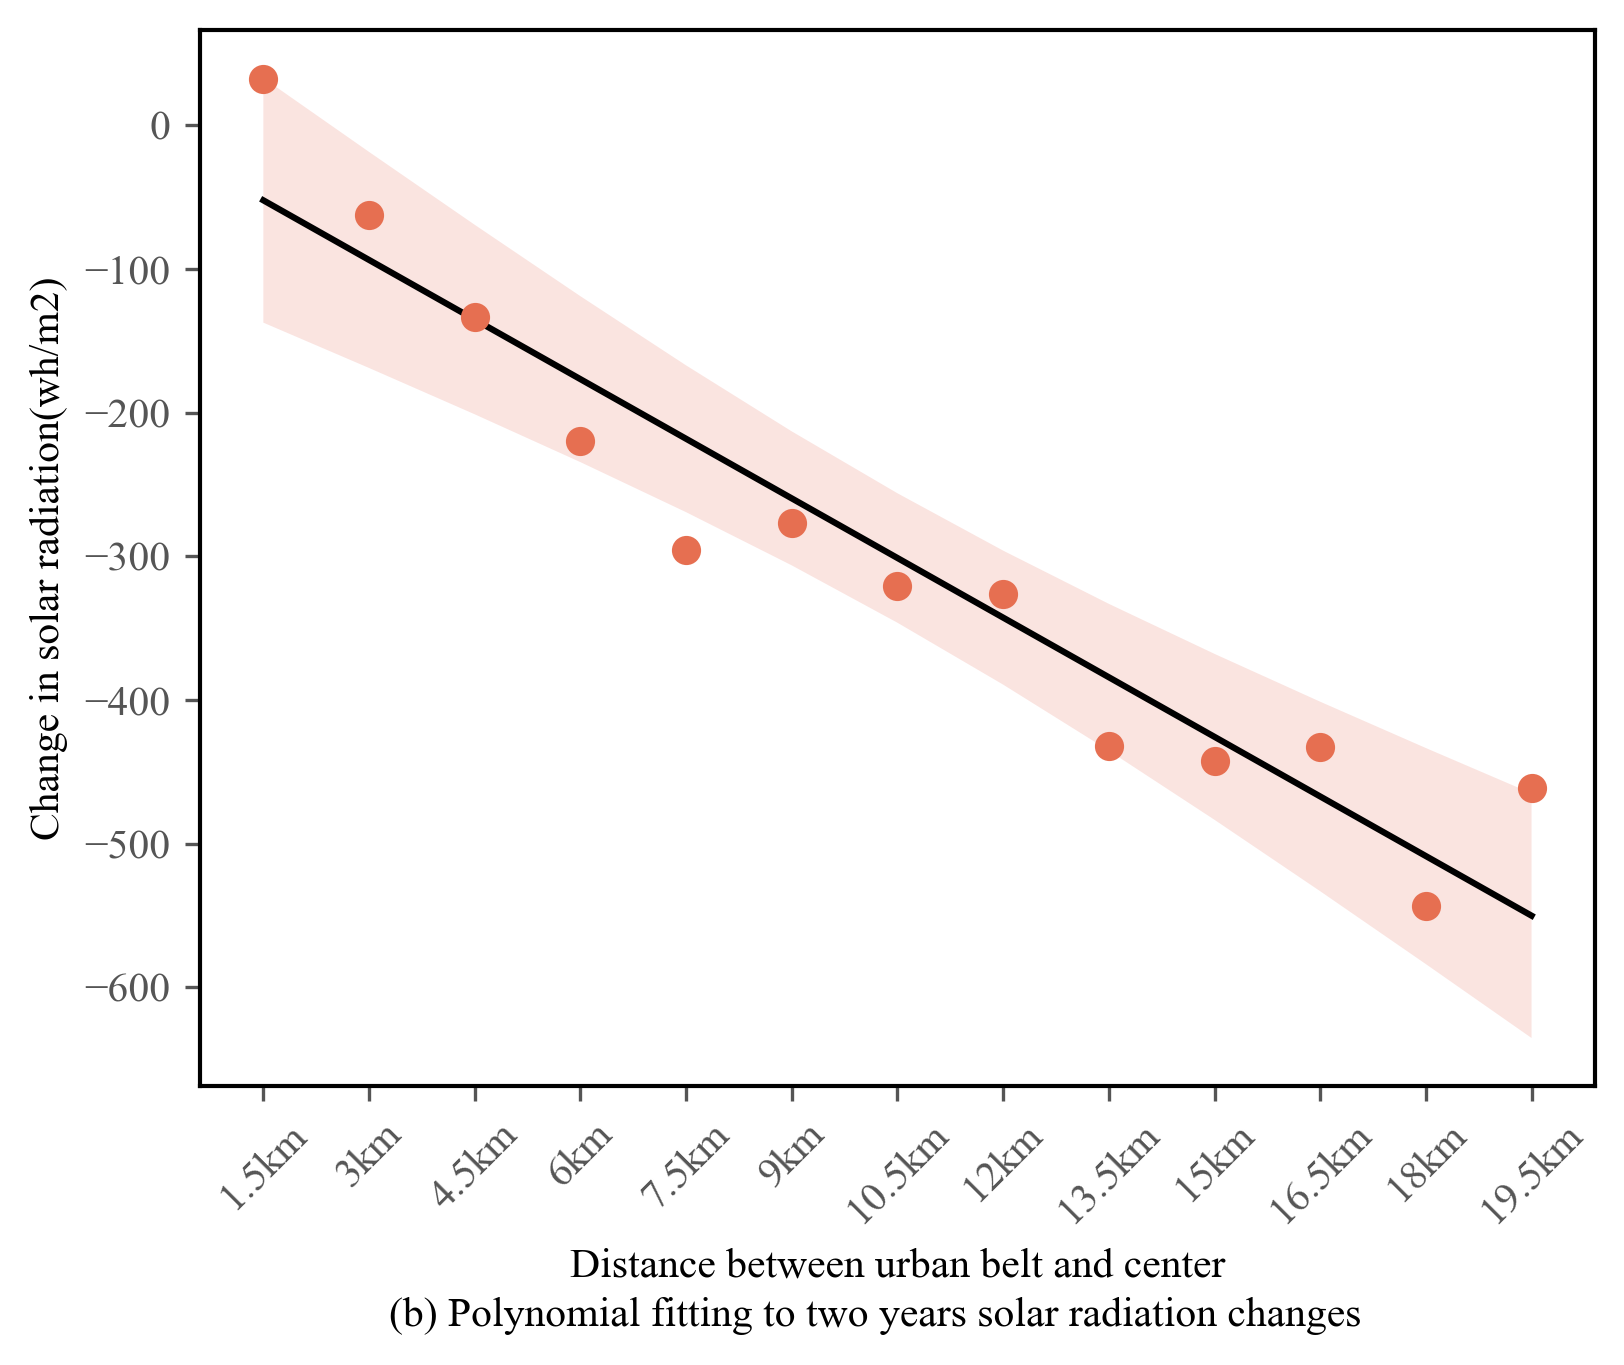

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 12, 13)
y = list(dt_2019_2013)


# 设置绘图尺寸
fig, ax = plt.subplots(figsize=(6,4),dpi=300)
# 使用 ggplot 样式
plt.style.use('ggplot')
# 将背景设为白色
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
# 设置边界线颜色为黑色
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# 绘制xy轴的标示
ax.set_xlabel('Distance between urban belt and center',fontsize=10,color='black')
ax.set_ylabel('Change in solar radiation(wh/m2)',fontsize=10,color='black')

# 使用 numpy.polyfit 函数拟合了一个一次多项式，并将拟合结果的斜率和截距存储在变量 a 和 b 中。
a, b = np.polyfit(x, y, deg=1)
print('斜率是{} 截距是{}'.format(a,b))
y_est = a * x + b
y_err = np.std(y) * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))

# 绘制斜线图
ax.plot(x, y_est, '-', color='black')

# 在图形中添加了一个误差带
# 其中 x 是 x 值的一维数组，y_est - y_err 和 y_est + y_err 是误差带的下限和上限的 y 值的一维数组
# alpha=0.2 是误差带的透明度。
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.15)
ax.plot(x, y, 'o', color='#e66f51')

# 设置坐标轴的刻度值
a = [0,1,2,3,4,5,6,7,8,9,10,11,12]
x_labels = ['1.5km', '3km', '4.5km', '6km','7.5km','9km','10.5km','12km','13.5km','15km','16.5km','18km','19.5km']
plt.xticks(a,x_labels,rotation = 45)

# 使用 plt.figtext 设置标题，并放置在底部
plt.figtext(0.5, -0.2, "(b) Polynomial fitting to two years solar radiation changes", ha="center", fontsize=10)

# 调整布局，以确保标题和图形不重叠
plt.subplots_adjust(bottom=0)

plt.show()
